<a href="https://colab.research.google.com/github/vanfotis/git-code-playground/blob/main/3210213_ml2025_2026.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Εργασία στο μάθημα Μηχανικής Μάθησης 2025-2026
# ΕΥΑΓΓΕΛΟΣ ΦΩΤΗΣ - 3210213

## Multiclass Classification – Glass Identification Dataset

Στόχος της παρούσας εργασίας είναι η υλοποίηση και εφαρμογή βασικών αλγορίθμων
Μηχανικής Μάθησης σε ένα πρόβλημα πολυταξινόμησης (multiclass classification),
σύμφωνα με την εκφώνηση του μαθήματος.

Ως dataset επιλέγεται το **Glass Identification dataset** από το UCI Machine Learning Repository.
Το dataset περιλαμβάνει χημικές μετρήσεις γυαλιού και στόχος είναι η πρόβλεψη
του τύπου γυαλιού, ο οποίος αντιστοιχεί σε διαφορετικές κλάσεις.

Στην εργασία υλοποιούνται από το μηδέν οι ακόλουθοι αλγόριθμοι:
- Principal Component Analysis (PCA)
- Least Squares για classification
- Logistic Regression με Stochastic Gradient Descent
- K Nearest Neighbors (KNN)
- Naive Bayes με κανονικές κατανομές
- Multilayer Perceptron (MLP) μέσω PyTorch
- Support Vector Machines (One-vs-Rest)
- K-Means clustering

Για κάθε μέθοδο παρουσιάζονται αποτελέσματα τόσο στο σύνολο εκπαίδευσης
όσο και στο σύνολο ελέγχου.


## Περιγραφή του προβλήματος και του dataset

Στην παρούσα εργασία μελετάται ένα πρόβλημα πολυταξινόμησης (multiclass classification) με χρήση του Glass Identification dataset. Στόχος είναι η πρόβλεψη της κατηγορίας ενός δείγματος γυαλιού βάσει των χημικών του χαρακτηριστικών.

Το dataset περιλαμβάνει συνολικά 214 δείγματα, καθένα από τα οποία περιγράφεται από 9 συνεχείς αριθμητικές μεταβλητές που αντιστοιχούν σε χημικές συγκεντρώσεις
(π.χ. Na, Mg, Al, Si κ.ά.). Η μεταβλητή στόχος (label) είναι κατηγορική και αντιστοιχεί στον τύπο του γυαλιού, με συνολικά 6 διαφορετικές κλάσεις.

Το πρόβλημα είναι επομένως πρόβλημα επιβλεπόμενης μάθησης, καθώς οι ετικέτες κλάσης είναι γνωστές, και συγκεκριμένα πολυταξινόμησης, δεδομένου ότι ο αριθμός των κλάσεων είναι μεγαλύτερος του δύο.


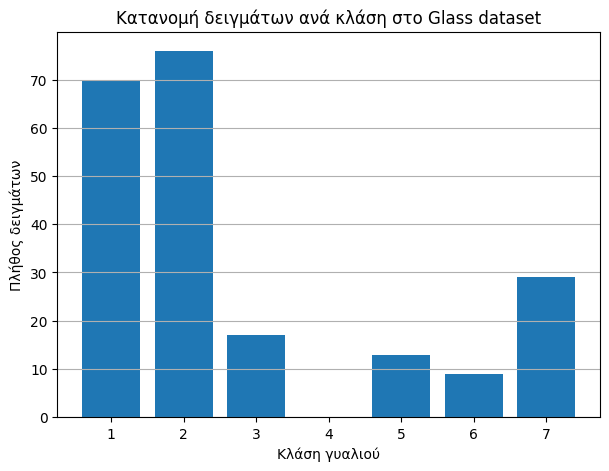

Συνολικό πλήθος δειγμάτων: 214
Πλήθος δειγμάτων ανά κλάση:
Κλάση 1: 70
Κλάση 2: 76
Κλάση 3: 17
Κλάση 5: 13
Κλάση 6: 9
Κλάση 7: 29


In [197]:
import matplotlib.pyplot as plt
import numpy as np


classes, counts = np.unique(y, return_counts=True)

plt.figure(figsize=(7,5))
plt.bar(classes, counts)
plt.xlabel("Κλάση γυαλιού")
plt.ylabel("Πλήθος δειγμάτων")
plt.title("Κατανομή δειγμάτων ανά κλάση στο Glass dataset")
plt.grid(axis="y")
plt.show()

# Συνολικό πλήθος δειγμάτων
total_samples = len(y)
print(f"Συνολικό πλήθος δειγμάτων: {total_samples}")

# Πλήθος δειγμάτων ανά κλάση
classes, counts = np.unique(y, return_counts=True)

print("Πλήθος δειγμάτων ανά κλάση:")
for c, cnt in zip(classes, counts):
    print(f"Κλάση {c}: {cnt}")


Η παραπάνω γραφική αναπαράσταση δείχνει ότι οι κλάσεις δεν είναι πλήρως ισορροπημένες, καθώς ορισμένες κατηγορίες γυαλιού εμφανίζονται συχνότερα από άλλες. Το γεγονός αυτό
μπορεί να επηρεάσει την απόδοση ορισμένων αλγορίθμων ταξινόμησης.


In [156]:
# Λήψη του Glass Identification dataset από το UCI Repository
# Το αρχείο θα αποθηκευτεί τοπικά στο περιβάλλον του Colab

!wget https://archive.ics.uci.edu/ml/machine-learning-databases/glass/glass.data


--2025-12-28 23:47:14--  https://archive.ics.uci.edu/ml/machine-learning-databases/glass/glass.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘glass.data.1’

glass.data.1            [ <=>                ]  11.62K  --.-KB/s    in 0s      

2025-12-28 23:47:14 (127 MB/s) - ‘glass.data.1’ saved [11903]



In [157]:
# Έλεγχος ότι το αρχείο κατέβηκε σωστά
!head glass.data


1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.00,1
2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.00,1
3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.00,1
4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.00,1
5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.00,1
6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.00,0.26,1
7,1.51743,13.30,3.60,1.14,73.09,0.58,8.17,0.00,0.00,1
8,1.51756,13.15,3.61,1.05,73.24,0.57,8.24,0.00,0.00,1
9,1.51918,14.04,3.58,1.37,72.08,0.56,8.30,0.00,0.00,1
10,1.51755,13.00,3.60,1.36,72.99,0.57,8.40,0.00,0.11,1


## Περιγραφή του Glass Identification Dataset

Το Glass Identification dataset προέρχεται από το UCI Machine Learning Repository
και περιλαμβάνει μετρήσεις χημικής σύστασης γυαλιού.
Κάθε δείγμα αντιστοιχεί σε ένα θραύσμα γυαλιού και περιγράφεται μέσω
εννέα αριθμητικών χαρακτηριστικών.

Τα χαρακτηριστικά αφορούν το δείκτη διάθλασης και τη συγκέντρωση
διαφόρων χημικών στοιχείων (π.χ. Na, Mg, Al, Si, Ca κ.ά.).
Η μεταβλητή-στόχος (label) αντιστοιχεί στον τύπο του γυαλιού
και το πρόβλημα αντιμετωπίζεται ως πολυταξινόμηση (multiclass classification).

Στη συνέχεια παρουσιάζεται το πλήθος των δειγμάτων, των χαρακτηριστικών
και των διαφορετικών κλάσεων του dataset.


In [158]:
import numpy as np
import pandas as pd

# Ονόματα στηλών σύμφωνα με την περιγραφή του dataset
columns = [
    "Id", "RI", "Na", "Mg", "Al", "Si",
    "K", "Ca", "Ba", "Fe", "Type"
]

# Φόρτωση δεδομένων
df = pd.read_csv("glass.data", header=None, names=columns)

# Εμφάνιση των πρώτων γραμμών
df.head()


,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [159]:
# Διαστάσεις dataset
print("Διαστάσεις dataset:", df.shape)

# Έλεγχος για κενές τιμές
print("\nΚενές τιμές ανά στήλη:")
print(df.isna().sum())

# Πλήθος δειγμάτων ανά κλάση
print("\nΚατανομή κλάσεων:")
print(df["Type"].value_counts().sort_index())


Διαστάσεις dataset: (214, 11)

Κενές τιμές ανά στήλη:
Id      0
RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

Κατανομή κλάσεων:
Type
1    70
2    76
3    17
5    13
6     9
7    29
Name: count, dtype: int64


## Προετοιμασία δεδομένων

Πριν την εφαρμογή των αλγορίθμων Μηχανικής Μάθησης, πραγματοποιείται
η κατάλληλη προεπεξεργασία των δεδομένων.
Συγκεκριμένα:

- Αφαιρείται το αναγνωριστικό χαρακτηριστικό (Id), καθώς δεν φέρει
  πληροφορία σχετική με την ταξινόμηση.
- Δημιουργούνται οι πίνακες χαρακτηριστικών (x) και ετικετών (y).
- Οι ετικέτες επανακωδικοποιούνται ώστε να λαμβάνουν τιμές στο διάστημα
  ([0, C-1]), όπου (C) το πλήθος των κλάσεων.
- Τα δεδομένα χωρίζονται σε σύνολο εκπαίδευσης και σύνολο ελέγχου
  με διατήρηση της κατανομής των κλάσεων.
- Εφαρμόζεται κανονικοποίηση (standardization) των χαρακτηριστικών,
  χρησιμοποιώντας στατιστικά μόνο από το σύνολο εκπαίδευσης.


In [160]:
# Αφαίρεση του Id και διαχωρισμός χαρακτηριστικών και ετικετών
X = df.drop(columns=["Id", "Type"]).to_numpy(dtype=float)
y = df["Type"].to_numpy()

# Επανακωδικοποίηση ετικετών σε 0, 1, ..., C-1
classes = np.unique(y)
class_to_index = {c: i for i, c in enumerate(classes)}
y_encoded = np.array([class_to_index[c] for c in y], dtype=int)

print("Σχήμα X:", X.shape)
print("Σχήμα y:", y_encoded.shape)
print("Πλήθος κλάσεων:", len(classes))


Σχήμα X: (214, 9)
Σχήμα y: (214,)
Πλήθος κλάσεων: 6


In [161]:
def stratified_train_test_split(X, y, test_ratio=0.2, seed=42):
    rng = np.random.default_rng(seed)

    X_train_list, y_train_list = [], []
    X_test_list, y_test_list = [], []

    for c in np.unique(y):
        indices = np.where(y == c)[0]
        rng.shuffle(indices)

        n_test = int(np.ceil(len(indices) * test_ratio))
        test_idx = indices[:n_test]
        train_idx = indices[n_test:]

        X_test_list.append(X[test_idx])
        y_test_list.append(y[test_idx])
        X_train_list.append(X[train_idx])
        y_train_list.append(y[train_idx])

    X_train = np.vstack(X_train_list)
    y_train = np.concatenate(y_train_list)
    X_test = np.vstack(X_test_list)
    y_test = np.concatenate(y_test_list)

    # Τελικό shuffle
    train_perm = rng.permutation(len(y_train))
    test_perm = rng.permutation(len(y_test))

    return (
        X_train[train_perm], X_test[test_perm],
        y_train[train_perm], y_test[test_perm]
    )

X_train, X_test, y_train, y_test = stratified_train_test_split(
    X, y_encoded, test_ratio=0.2, seed=42
)

print("Train:", X_train.shape, "Test:", X_test.shape)


Train: (169, 9) Test: (45, 9)


In [162]:
def standardize_fit(X):
    mean = X.mean(axis=0)
    std = X.std(axis=0)
    std[std == 0] = 1.0
    return mean, std

def standardize_transform(X, mean, std):
    return (X - mean) / std

# Υπολογισμός στατιστικών ΜΟΝΟ στο training set
mean_train, std_train = standardize_fit(X_train)

X_train_std = standardize_transform(X_train, mean_train, std_train)
X_test_std = standardize_transform(X_test, mean_train, std_train)


## Principal Component Analysis (PCA)

Για τη μείωση της διαστασιμότητας των δεδομένων εφαρμόζεται ο αλγόριθμος
Principal Component Analysis (PCA).
Ο PCA υπολογίζει νέους άξονες (κύριες συνιστώσες) οι οποίοι αντιστοιχούν
στις κατευθύνσεις μέγιστης διακύμανσης των δεδομένων.

Στην παρούσα εργασία, ο PCA εφαρμόζεται για την προβολή των δεδομένων
σε χώρο δύο διαστάσεων, με σκοπό την οπτική διερεύνηση της δομής
και του διαχωρισμού των κλάσεων.
Παρουσιάζεται επίσης το ποσοστό διακύμανσης που εξηγείται από
τις κύριες συνιστώσες.


In [163]:
import matplotlib.pyplot as plt

def pca_fit(X):
    """
    Υπολογισμός PCA:
    - Κεντράρισμα δεδομένων
    - Υπολογισμός πίνακα συνδιακύμανσης
    - Ιδιοδιάσπαση
    """
    # Κεντράρισμα
    X_centered = X - X.mean(axis=0)

    # Πίνακας συνδιακύμανσης
    covariance_matrix = np.cov(X_centered, rowvar=False)

    # Ιδιοτιμές και ιδιοδιανύσματα
    eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix)

    # Ταξινόμηση κατά φθίνουσα ιδιοτιμή
    sorted_idx = np.argsort(eigenvalues)[::-1]
    eigenvalues = eigenvalues[sorted_idx]
    eigenvectors = eigenvectors[:, sorted_idx]

    return eigenvalues, eigenvectors, X_centered


In [164]:
# Υπολογισμός PCA στο training set
eigenvalues, eigenvectors, X_centered = pca_fit(X_train_std)

# Επιλογή των 2 πρώτων κύριων συνιστωσών
W = eigenvectors[:, :2]

# Προβολή δεδομένων σε 2D
X_pca_2d = X_centered @ W

print("Σχήμα προβολής:", X_pca_2d.shape)


Σχήμα προβολής: (169, 2)


In [165]:
# Ποσοστό εξηγούμενης διακύμανσης
explained_variance_ratio = eigenvalues / np.sum(eigenvalues)

print("Explained variance ratio (2 πρώτες συνιστώσες):")
print(explained_variance_ratio[:2])
print("Συνολικό ποσοστό:", explained_variance_ratio[:2].sum())


Explained variance ratio (2 πρώτες συνιστώσες):
[0.27693222 0.23215779]
Συνολικό ποσοστό: 0.5090900089419839


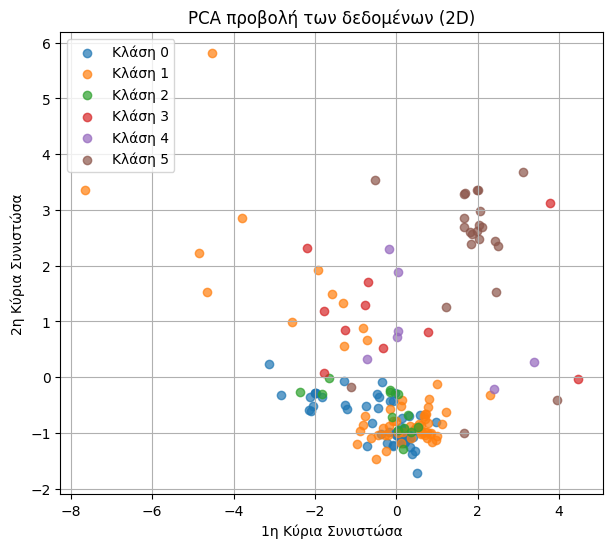

In [166]:
plt.figure(figsize=(7, 6))

for c in np.unique(y_train):
    idx = y_train == c
    plt.scatter(
        X_pca_2d[idx, 0],
        X_pca_2d[idx, 1],
        label=f"Κλάση {c}",
        alpha=0.7
    )

plt.xlabel("1η Κύρια Συνιστώσα")
plt.ylabel("2η Κύρια Συνιστώσα")
plt.title("PCA προβολή των δεδομένων (2D)")
plt.legend()
plt.grid(True)
plt.show()


## Least Squares για πολυταξινόμηση

Ο αλγόριθμος των Ελαχίστων Τετραγώνων (Least Squares) χρησιμοποιείται κλασικά
σε προβλήματα παλινδρόμησης. Στην παρούσα εργασία προσαρμόζεται για την
αντιμετώπιση προβλήματος πολυταξινόμησης (multiclass classification).

Η προσαρμογή γίνεται μέσω αναπαράστασης των ετικετών σε μορφή one-hot vectors
και εκπαίδευσης ενός γραμμικού μοντέλου που προβλέπει διανυσματικές εξόδους.
Η τελική κλάση κάθε δείγματος προκύπτει ως το index της μέγιστης εξόδου
(argmax).


In [167]:
import numpy as np

def one_hot_encode(y, num_classes):
    Y = np.zeros((len(y), num_classes))
    Y[np.arange(len(y)), y] = 1
    return Y

C = len(np.unique(y_train))

Y_train_oh = one_hot_encode(y_train, C)
Y_test_oh = one_hot_encode(y_test, C)

print("One-hot y_train:", Y_train_oh.shape)


One-hot y_train: (169, 6)


In [168]:
def least_squares_train(X, Y, reg=1e-4):
    """
    Εκπαίδευση Least Squares classifier
    """
    d = X.shape[1]
    I = np.eye(d)

    # Κλειστή μορφή λύσης με κανονικοποίηση (ridge)
    W = np.linalg.inv(X.T @ X + reg * I) @ X.T @ Y
    return W

# Εκπαίδευση στο training set
W_ls = least_squares_train(X_train_std, Y_train_oh)

print("Σχήμα W:", W_ls.shape)


Σχήμα W: (9, 6)


In [169]:
def least_squares_predict(X, W):
    scores = X @ W
    return np.argmax(scores, axis=1)

def accuracy(y_true, y_pred):
    return np.mean(y_true == y_pred)

# Προβλέψεις
y_train_pred = least_squares_predict(X_train_std, W_ls)
y_test_pred = least_squares_predict(X_test_std, W_ls)

# Accuracy
train_acc = accuracy(y_train, y_train_pred)
test_acc = accuracy(y_test, y_test_pred)

print(f"Train accuracy: {train_acc:.4f}")
print(f"Test accuracy : {test_acc:.4f}")


Train accuracy: 0.6036
Test accuracy : 0.6222


Η σχετικά χαμηλή ακρίβεια του Least Squares classifier είναι αναμενόμενη,
καθώς πρόκειται για γραμμικό μοντέλο που δεν είναι σχεδιασμένο ειδικά
για προβλήματα ταξινόμησης και δυσκολεύεται σε δεδομένα με μη γραμμικά
διαχωρίσιμες κλάσεις, όπως το Glass dataset.

## Logistic Regression (Softmax) με SGD και Cross-Entropy Loss

Η λογιστική παλινδρόμηση επεκτείνεται στην πολυταξινόμηση μέσω της συνάρτησης
softmax. Το μοντέλο παράγει για κάθε δείγμα ένα διάνυσμα scores, το οποίο
μετατρέπεται σε πιθανότητες κλάσεων μέσω softmax.

Για την εκπαίδευση χρησιμοποιείται ο αλγόριθμος Stochastic Gradient Descent (SGD)
και ως συνάρτηση κόστους το Cross-Entropy Loss. Παρουσιάζονται η ακρίβεια
(accuracy) στο training και στο test set, καθώς και η εξέλιξη του cross-entropy loss
ανά epoch για τα δύο σύνολα.


In [170]:
def softmax(logits):
    """
    logits: (N, C)
    Επιστρέφει πιθανότητες (N, C)
    """
    # Σταθερότητα: αφαιρούμε το max ανά γραμμή
    z = logits - np.max(logits, axis=1, keepdims=True)
    exp_z = np.exp(z)
    return exp_z / np.sum(exp_z, axis=1, keepdims=True)

def cross_entropy_loss(probs, y_true):
    """
    probs: (N, C) πιθανότητες
    y_true: (N,) ακέραιες ετικέτες 0..C-1
    """
    eps = 1e-12
    N = len(y_true)
    return -np.mean(np.log(probs[np.arange(N), y_true] + eps))

def predict_from_probs(probs):
    return np.argmax(probs, axis=1)

def accuracy(y_true, y_pred):
    return np.mean(y_true == y_pred)


In [171]:
#Εκπαίδευση Logistic Regression με mini-batch SGD

def add_bias_column(X):
    return np.hstack([X, np.ones((X.shape[0], 1))])

Xtr = add_bias_column(X_train_std)
Xte = add_bias_column(X_test_std)

d_plus = Xtr.shape[1]
C = len(np.unique(y_train))

def train_logistic_sgd(X_train, y_train, X_test, y_test,
                       lr=0.05, epochs=200, batch_size=32, reg=1e-4, seed=42):
    rng = np.random.default_rng(seed)

    # Αρχικοποίηση βαρών (d+1, C)
    W = rng.normal(0, 0.01, size=(X_train.shape[1], C))

    train_losses, test_losses = [], []
    train_accs, test_accs = [], []

    N = X_train.shape[0]

    for epoch in range(epochs):
        # shuffle indices
        perm = rng.permutation(N)
        Xs = X_train[perm]
        ys = y_train[perm]

        # mini-batches
        for start in range(0, N, batch_size):
            end = min(start + batch_size, N)
            Xb = Xs[start:end]
            yb = ys[start:end]
            nb = len(yb)

            # forward
            logits = Xb @ W
            probs = softmax(logits)

            # gradient: (X^T (P - Y)) / nb
            # φτιάχνουμε (P - Y) χωρίς one-hot πλήρως
            grad_logits = probs
            grad_logits[np.arange(nb), yb] -= 1.0
            grad_logits /= nb

            grad_W = Xb.T @ grad_logits

            # L2 regularization (μην κανονικοποιείς το bias)
            grad_W[:-1, :] += reg * W[:-1, :]

            # update
            W -= lr * grad_W

        # αξιολόγηση στο τέλος κάθε epoch
        train_probs = softmax(X_train @ W)
        test_probs  = softmax(X_test @ W)

        tr_loss = cross_entropy_loss(train_probs, y_train)
        te_loss = cross_entropy_loss(test_probs, y_test)

        tr_pred = predict_from_probs(train_probs)
        te_pred = predict_from_probs(test_probs)

        tr_acc = accuracy(y_train, tr_pred)
        te_acc = accuracy(y_test, te_pred)

        train_losses.append(tr_loss)
        test_losses.append(te_loss)
        train_accs.append(tr_acc)
        test_accs.append(te_acc)

    history = {
        "W": W,
        "train_losses": train_losses,
        "test_losses": test_losses,
        "train_accs": train_accs,
        "test_accs": test_accs
    }
    return history

history_lr = train_logistic_sgd(
    Xtr, y_train, Xte, y_test,
    lr=0.05, epochs=200, batch_size=32, reg=1e-4, seed=42
)

W_lr = history_lr["W"]
print("Τελική train accuracy:", history_lr["train_accs"][-1])
print("Τελική test accuracy :", history_lr["test_accs"][-1])


Τελική train accuracy: 0.7041420118343196
Τελική test accuracy : 0.6444444444444445


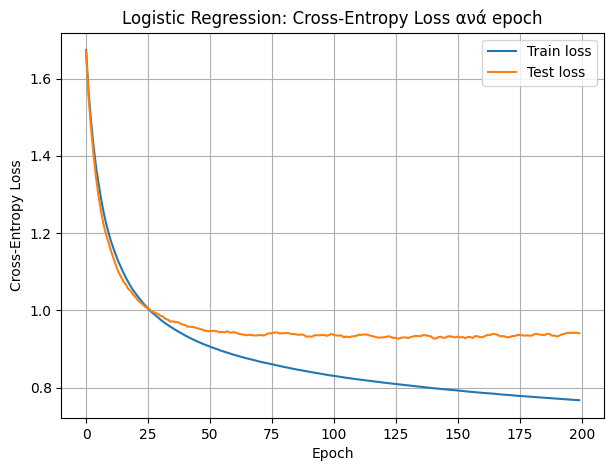

In [172]:
#Plot Cross-Entropy Loss ανά epoch (train & test)

plt.figure(figsize=(7, 5))
plt.plot(history_lr["train_losses"], label="Train loss")
plt.plot(history_lr["test_losses"], label="Test loss")
plt.xlabel("Epoch")
plt.ylabel("Cross-Entropy Loss")
plt.title("Logistic Regression: Cross-Entropy Loss ανά epoch")
plt.legend()
plt.grid(True)
plt.show()


In [173]:
#Τελικό accuracy (Train & Test)

final_train_acc = history_lr["train_accs"][-1]
final_test_acc  = history_lr["test_accs"][-1]

print(f"Logistic Regression - Train accuracy: {final_train_acc:.4f}")
print(f"Logistic Regression - Test accuracy : {final_test_acc:.4f}")


Logistic Regression - Train accuracy: 0.7041
Logistic Regression - Test accuracy : 0.6444


Η Logistic Regression παρουσιάζει βελτιωμένη απόδοση σε σχέση με τον
Least Squares classifier, γεγονός αναμενόμενο καθώς βελτιστοποιεί απευθείας
συνάρτηση κόστους κατάλληλη για ταξινόμηση (Cross-Entropy).

Παρατηρείται μικρή απόκλιση μεταξύ training και test accuracy, η οποία
υποδηλώνει ήπιο overfitting, χωρίς όμως σημαντική απώλεια γενίκευσης.
Οι καμπύλες cross-entropy loss συγκλίνουν ομαλά, επιβεβαιώνοντας τη
σταθερότητα της εκπαίδευσης.

## K Nearest Neighbors (KNN)

Ο αλγόριθμος K Nearest Neighbors (KNN) είναι μη-παραμετρικός ταξινομητής,
ο οποίος προβλέπει την κλάση ενός δείγματος με βάση τις κλάσεις των K
πλησιέστερων δειγμάτων του training set, σύμφωνα με μια μετρική απόστασης.

Στην παρούσα εργασία χρησιμοποιείται η Ευκλείδεια απόσταση και εφαρμόζεται
KNN για τιμές K από 1 έως 10. Παρουσιάζονται οι ακρίβειες (accuracy) στο
training και στο test set για κάθε τιμή του K.


In [174]:
#Υλοποίηση KNN (Euclidean distance)

def knn_predict(X_train, y_train, X_query, K=3):
    """
    KNN πρόβλεψη για όλα τα δείγματα του X_query.
    Χρησιμοποιεί Ευκλείδεια απόσταση.
    """
    y_pred = np.empty(X_query.shape[0], dtype=int)

    for i in range(X_query.shape[0]):
        # Υπολογισμός τετραγωνικών αποστάσεων (πιο γρήγορο από sqrt)
        diffs = X_train - X_query[i]
        dists = np.sum(diffs * diffs, axis=1)  # (N_train,)

        # indices των K μικρότερων αποστάσεων
        nn_idx = np.argpartition(dists, K-1)[:K]
        nn_labels = y_train[nn_idx]

        # πλειοψηφική ψήφος (majority vote)
        counts = np.bincount(nn_labels)
        y_pred[i] = np.argmax(counts)

    return y_pred


In [175]:
# Αξιολόγηση για K=1..10

def accuracy(y_true, y_pred):
    return np.mean(y_true == y_pred)

Ks = list(range(1, 11))
train_accs_knn = []
test_accs_knn = []

for K in Ks:
    y_train_pred = knn_predict(X_train_std, y_train, X_train_std, K=K)
    y_test_pred  = knn_predict(X_train_std, y_train, X_test_std,  K=K)

    tr_acc = accuracy(y_train, y_train_pred)
    te_acc = accuracy(y_test,  y_test_pred)

    train_accs_knn.append(tr_acc)
    test_accs_knn.append(te_acc)

    print(f"K={K:2d} | Train acc: {tr_acc:.4f} | Test acc: {te_acc:.4f}")


K= 1 | Train acc: 1.0000 | Test acc: 0.7778
K= 2 | Train acc: 0.8225 | Test acc: 0.6667
K= 3 | Train acc: 0.8225 | Test acc: 0.6667
K= 4 | Train acc: 0.7574 | Test acc: 0.7111
K= 5 | Train acc: 0.7456 | Test acc: 0.6667
K= 6 | Train acc: 0.7456 | Test acc: 0.6889
K= 7 | Train acc: 0.7160 | Test acc: 0.6222
K= 8 | Train acc: 0.7219 | Test acc: 0.6889
K= 9 | Train acc: 0.7101 | Test acc: 0.6444
K=10 | Train acc: 0.7278 | Test acc: 0.6667


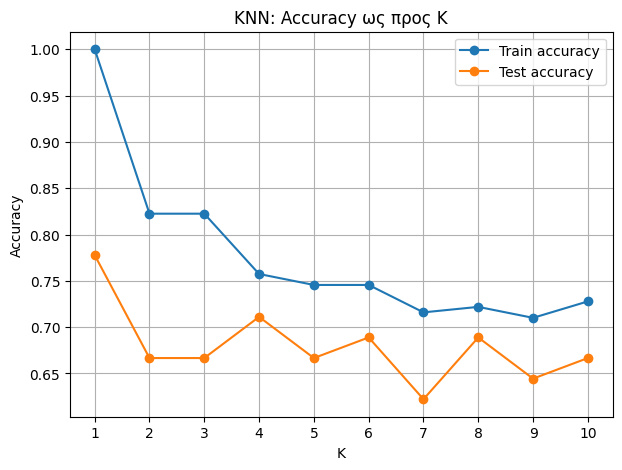

In [176]:
#Plot accuracy vs K

plt.figure(figsize=(7, 5))
plt.plot(Ks, train_accs_knn, marker="o", label="Train accuracy")
plt.plot(Ks, test_accs_knn, marker="o", label="Test accuracy")
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.title("KNN: Accuracy ως προς K")
plt.xticks(Ks)
plt.grid(True)
plt.legend()
plt.show()


Η απόδοση του KNN δεν μεταβάλλεται μονοτονικά ως προς την τιμή του K.
Παρατηρούνται τοπικές μειώσεις της ακρίβειας (π.χ. για K=7 και K=9),
γεγονός αναμενόμενο σε δεδομένα με επικαλυπτόμενες και ανισόρροπες κλάσεις,
καθώς η πλειοψηφική ψήφος επηρεάζεται έντονα από τη σύνθεση της τοπικής γειτονιάς.

Το καλύτερο αποτέλεσμα παρατηρείται για K=4

## Gaussian Naive Bayes

Ο Gaussian Naive Bayes είναι πιθανοτικός ταξινομητής που βασίζεται στο θεώρημα
του Bayes και στην υπόθεση ανεξαρτησίας των χαρακτηριστικών δεδομένης της κλάσης.
Υποθέτει ότι κάθε χαρακτηριστικό ακολουθεί κανονική (Gaussian) κατανομή
εντός κάθε κλάσης.

Για κάθε κλάση υπολογίζονται οι μέσες τιμές και οι διακυμάνσεις των χαρακτηριστικών,
καθώς και οι εκ των προτέρων πιθανότητες (priors).
Η πρόβλεψη γίνεται επιλέγοντας την κλάση με τη μέγιστη εκ των υστέρων πιθανότητα.


In [177]:
#Εκπαίδευση Gaussian Naive Bayes

def gnb_train(X, y):
    """
    Εκπαίδευση Gaussian Naive Bayes.
    Επιστρέφει:
    - class_priors
    - class_means
    - class_vars
    """
    classes = np.unique(y)
    C = len(classes)
    d = X.shape[1]

    class_priors = np.zeros(C)
    class_means = np.zeros((C, d))
    class_vars = np.zeros((C, d))

    for c in classes:
        Xc = X[y == c]
        class_priors[c] = Xc.shape[0] / X.shape[0]
        class_means[c] = Xc.mean(axis=0)
        class_vars[c] = Xc.var(axis=0) + 1e-9  # για αριθμητική σταθερότητα

    return class_priors, class_means, class_vars


In [178]:
#Πρόβλεψη Gaussian Naive Bayes

def gnb_predict(X, class_priors, class_means, class_vars):
    """
    Πρόβλεψη Gaussian Naive Bayes σε log-space.
    """
    N, d = X.shape
    C = len(class_priors)

    log_probs = np.zeros((N, C))

    for c in range(C):
        log_prior = np.log(class_priors[c])

        # Gaussian log-likelihood
        log_likelihood = -0.5 * np.sum(
            np.log(2 * np.pi * class_vars[c]) +
            ((X - class_means[c]) ** 2) / class_vars[c],
            axis=1
        )

        log_probs[:, c] = log_prior + log_likelihood

    return np.argmax(log_probs, axis=1)


In [179]:
#Εκπαίδευση & Αξιολόγηση

# Εκπαίδευση
priors, means, vars_ = gnb_train(X_train_std, y_train)

# Προβλέψεις
y_train_pred = gnb_predict(X_train_std, priors, means, vars_)
y_test_pred  = gnb_predict(X_test_std,  priors, means, vars_)

# Accuracy
train_acc_gnb = accuracy(y_train, y_train_pred)
test_acc_gnb  = accuracy(y_test,  y_test_pred)

print(f"Gaussian NB - Train accuracy: {train_acc_gnb:.4f}")
print(f"Gaussian NB - Test accuracy : {test_acc_gnb:.4f}")


Gaussian NB - Train accuracy: 0.3195
Gaussian NB - Test accuracy : 0.3333


Ο Gaussian Naive Bayes παρουσιάζει χαμηλή απόδοση τόσο στο training όσο
και στο test set. Το αποτέλεσμα αυτό είναι αναμενόμενο, καθώς το Glass
dataset παραβιάζει την υπόθεση ανεξαρτησίας των χαρακτηριστικών, δεδομένης
της κλάσης, ενώ οι κατανομές των χαρακτηριστικών εμφανίζουν σημαντική
επικάλυψη μεταξύ των κλάσεων.

## Multilayer Perceptron (MLP)

Για την επίλυση του προβλήματος πολυταξινόμησης υλοποιείται ένα
Multilayer Perceptron (MLP) χρησιμοποιώντας το framework PyTorch.
Το νευρωνικό δίκτυο αποτελείται από πολλαπλά γραμμικά επίπεδα
σε συνδυασμό με μη γραμμικές συναρτήσεις ενεργοποίησης.

Η εκπαίδευση πραγματοποιείται με τη χρήση του αλγορίθμου
Stochastic Gradient Descent και ως συνάρτηση κόστους
χρησιμοποιείται το Cross-Entropy Loss.
Παρουσιάζονται η ακρίβεια στο training και στο test set,
καθώς και η εξέλιξη της συνάρτησης κόστους ανά epoch.


In [180]:
import random
import numpy as np

import torch
import torch.nn as nn
import torch.optim as optim

# Μετατροπή NumPy → PyTorch tensors
Xtr_t = torch.tensor(X_train_std, dtype=torch.float32)
ytr_t = torch.tensor(y_train, dtype=torch.long)

Xte_t = torch.tensor(X_test_std, dtype=torch.float32)
yte_t = torch.tensor(y_test, dtype=torch.long)

input_dim = Xtr_t.shape[1]
num_classes = len(torch.unique(ytr_t))


#Ορισμός MLP μοντέλου

class MLP(nn.Module):
    def __init__(self, input_dim, num_classes):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(input_dim, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, num_classes)
        )

    def forward(self, x):
        return self.net(x)

#Loss, Optimizer


seed = 42
random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)

#Για GPU:
torch.cuda.manual_seed_all(seed)

model = MLP(input_dim, num_classes)

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.05, momentum=0.9)


In [181]:
#Εκπαίδευση MLP

epochs = 200

train_losses = []
test_losses = []
train_accs = []
test_accs = []

for epoch in range(epochs):
    # --- TRAIN ---
    model.train()
    optimizer.zero_grad()

    outputs = model(Xtr_t)
    loss = criterion(outputs, ytr_t)
    loss.backward()
    optimizer.step()

    train_losses.append(loss.item())

    with torch.no_grad():
        preds = torch.argmax(outputs, dim=1)
        train_accs.append((preds == ytr_t).float().mean().item())

    # --- TEST ---
    model.eval()
    with torch.no_grad():
        outputs_test = model(Xte_t)
        loss_test = criterion(outputs_test, yte_t)
        test_losses.append(loss_test.item())

        preds_test = torch.argmax(outputs_test, dim=1)
        test_accs.append((preds_test == yte_t).float().mean().item())


In [182]:
#Αποτελέσματα (Accuracy)

print(f"MLP - Train accuracy: {train_accs[-1]:.4f}")
print(f"MLP - Test accuracy : {test_accs[-1]:.4f}")


MLP - Train accuracy: 0.9172
MLP - Test accuracy : 0.7111


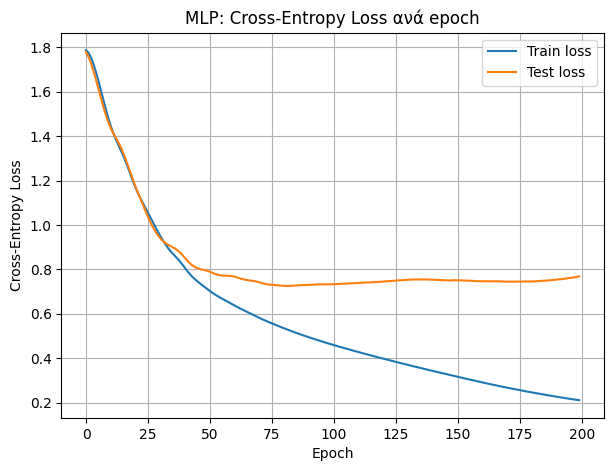

In [183]:
#Plot Loss ανά epoch

plt.figure(figsize=(7, 5))
plt.plot(train_losses, label="Train loss")
plt.plot(test_losses, label="Test loss")
plt.xlabel("Epoch")
plt.ylabel("Cross-Entropy Loss")
plt.title("MLP: Cross-Entropy Loss ανά epoch")
plt.legend()
plt.grid(True)
plt.show()


Η εκπαίδευση του MLP πραγματοποιήθηκε με Stochastic Gradient Descent.
Για τη βελτίωση της σύγκλισης χρησιμοποιήθηκε όρος momentum, ο οποίος αποτελεί υπερπαράμετρο του SGD και δεν μεταβάλλει το μοντέλο ή τη συνάρτηση κόστους. Η χρήση του momentum επιτάχυνε τη σύγκλιση και επέτρεψε στο μοντέλο να εκμεταλλευτεί καλύτερα τη μη γραμμικότητά του.

Λόγω της στοχαστικής φύσης της εκπαίδευσης νευρωνικών δικτύων,χρησιμοποιείται σταθερό seed για αναπαραγωγιμότητα των αποτελεσμάτων. Για αυτόν το λόγο, θέτουμε seed πριν την αρχικοποίηση του μοντέλου, ώστε η τυχαιότητα της εκπαίδευσης να είναι ελεγχόμενη και τα αποτελέσματα να είναι συγκρίσιμα.

##SVM (Linear) με One-vs-Rest, Hinge Loss + SGD

## Support Vector Machines (SVM) με One-vs-Rest

Ο αλγόριθμος SVM είναι γραμμικός ταξινομητής που στοχεύει στη μεγιστοποίηση του περιθωρίου (margin) μεταξύ των κλάσεων. Για δυαδική ταξινόμηση χρησιμοποιεί τη hinge loss σε συνδυασμό με κανονικοποίηση L2.

Για την αντιμετώπιση του πολυταξινομικού προβλήματος εφαρμόζεται προσέγγιση One-vs-Rest: εκπαιδεύεται ένα δυαδικό SVM για κάθε κλάση, θεωρώντας την ως θετική
(+1) και όλες τις υπόλοιπες ως αρνητικές (-1). Η τελική πρόβλεψη προκύπτει επιλέγοντας την κλάση με το μεγαλύτερο score (wᵀx + b).


In [184]:
#Βοηθητικές συναρτήσεις (hinge loss, accuracy)


def accuracy(y_true, y_pred):
    return np.mean(y_true == y_pred)

def hinge_loss(scores, y_bin):
    """
    scores: (N,) = w^T x + b
    y_bin: (N,) με τιμές +1 ή -1
    """
    margins = 1 - y_bin * scores
    return np.mean(np.maximum(0, margins))


In [185]:
#Εκπαίδευση Binary Linear SVM με SGD


def train_linear_svm_sgd(X, y_bin, lr=0.01, epochs=200, batch_size=32, reg=1e-4, seed=42):
    """
    Binary Linear SVM (primal) με hinge loss και L2 regularization.
    y_bin: +1 / -1
    """
    rng = np.random.default_rng(seed)
    N, d = X.shape

    w = rng.normal(0, 0.01, size=d)
    b = 0.0

    train_losses = []

    for epoch in range(epochs):
        perm = rng.permutation(N)
        Xs = X[perm]
        ys = y_bin[perm]

        for start in range(0, N, batch_size):
            end = min(start + batch_size, N)
            Xb = Xs[start:end]
            yb = ys[start:end]
            nb = len(yb)

            scores = Xb @ w + b
            margins = 1 - yb * scores
            active = margins > 0  # σημεία που παραβιάζουν το margin

            # gradient hinge + L2
            # d/dw: reg*w - mean( y*x ) για active samples
            grad_w = reg * w
            grad_b = 0.0

            if np.any(active):
                m = np.sum(active)  # πόσα active samples
                X_active = Xb[active]
                y_active = yb[active]
                grad_w -= (X_active.T @ y_active) / m#nb
                grad_b -= np.sum(y_active) / m#nb

            # update
            w -= lr * grad_w
            b -= lr * grad_b

        # loss στο τέλος του epoch
        full_scores = X @ w + b
        loss = hinge_loss(full_scores, y_bin) + 0.5 * reg * np.sum(w*w)
        train_losses.append(loss)

    return w, b, train_losses


In [186]:
#One-vs-Rest Training (ένα SVM ανά κλάση)

classes = np.unique(y_train)
C = len(classes)

svm_ws = np.zeros((C, X_train_std.shape[1]))
svm_bs = np.zeros(C)

svm_losses = []  # θα κρατήσουμε loss curves ανά κλάση (προαιρετικά)

for c in classes:
    # One-vs-Rest labels: +1 για την κλάση c, -1 για όλες τις άλλες
    y_bin = np.where(y_train == c, 1, -1).astype(float)

    w, b, losses = train_linear_svm_sgd(
        X_train_std, y_bin,
        lr=0.005, epochs=200, batch_size=32, reg=1e-4, seed=42
    )

    svm_ws[c] = w
    svm_bs[c] = b
    svm_losses.append(losses)

print("Ολοκληρώθηκε η εκπαίδευση One-vs-Rest SVM για όλες τις κλάσεις.")


Ολοκληρώθηκε η εκπαίδευση One-vs-Rest SVM για όλες τις κλάσεις.


In [187]:
#Πρόβλεψη multiclass (argmax score)

def ovr_svm_predict(X, ws, bs):
    # scores: (N, C)
    scores = X @ ws.T + bs
    return np.argmax(scores, axis=1)

y_train_pred = ovr_svm_predict(X_train_std, svm_ws, svm_bs)
y_test_pred  = ovr_svm_predict(X_test_std,  svm_ws, svm_bs)

train_acc_svm = accuracy(y_train, y_train_pred)
test_acc_svm  = accuracy(y_test,  y_test_pred)

print(f"SVM (OvR) - Train accuracy: {train_acc_svm:.4f}")
print(f"SVM (OvR) - Test accuracy : {test_acc_svm:.4f}")


SVM (OvR) - Train accuracy: 0.6213
SVM (OvR) - Test accuracy : 0.6000


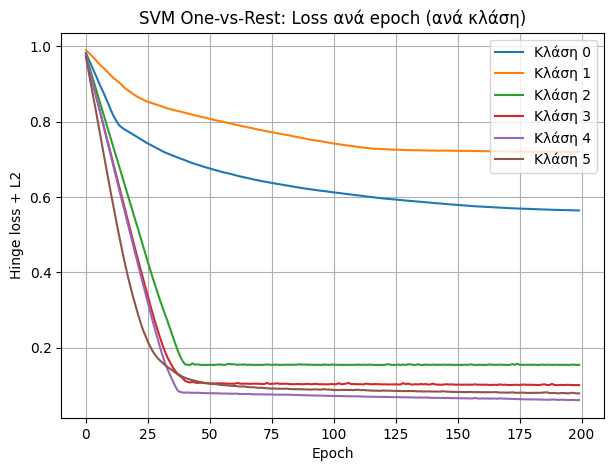

In [188]:
#Plot loss (προαιρετικό αλλά καλό)

plt.figure(figsize=(7,5))
for c in classes:
    plt.plot(svm_losses[c], label=f"Κλάση {c}")
plt.xlabel("Epoch")
plt.ylabel("Hinge loss + L2")
plt.title("SVM One-vs-Rest: Loss ανά epoch (ανά κλάση)")
plt.legend()
plt.grid(True)
plt.show()


Το γραμμικό SVM με προσέγγιση One-vs-Rest παρουσιάζει χαμηλότερη απόδοση σε σχέση με τη λογιστική παλινδρόμηση και το MLP. Το αποτέλεσμα αυτό είναι αναμενόμενο, καθώς το Glass dataset δεν είναι γραμμικά διαχωρίσιμο και οι κλάσεις εμφανίζουν σημαντική επικάλυψη. Παρότι η συνάρτηση κόστους συγκλίνει ομαλά, το μοντέλο παρουσιάζει underfitting.

## K-Means Clustering

Ο αλγόριθμος K-Means αποτελεί μη επιβλεπόμενη μέθοδο συσταδοποίησης (clustering), κατά την οποία τα δεδομένα ομαδοποιούνται σε K συστάδες βάσει της απόστασής τους
από τα κέντρα (centroids) των συστάδων.

Στην παρούσα εργασία εφαρμόζεται ο K-Means με αριθμό συστάδων ίσο με τον αριθμό των διαφορετικών κλάσεων του dataset (K=6). Η εκπαίδευση πραγματοποιείται χωρίς χρήση των ετικετών κλάσης. Για σκοπούς αξιολόγησης, οι συστάδες αντιστοιχίζονται εκ των υστέρων στις πραγματικές κλάσεις.


In [189]:
#Υλοποίηση K-Means

def kmeans(X, K, max_iters=100, seed=42):
    rng = np.random.default_rng(seed)
    N, d = X.shape

    # Τυχαία αρχικοποίηση centroids
    centroids = X[rng.choice(N, K, replace=False)]

    for _ in range(max_iters):
        # Ανάθεση σημείων στα κοντινότερα centroids
        dists = np.linalg.norm(X[:, None, :] - centroids[None, :, :], axis=2)
        labels = np.argmin(dists, axis=1)

        # Ενημέρωση centroids
        new_centroids = np.array([
            X[labels == k].mean(axis=0) if np.any(labels == k) else centroids[k]
            for k in range(K)
        ])

        # Έλεγχος σύγκλισης
        if np.allclose(centroids, new_centroids):
            break

        centroids = new_centroids

    return labels, centroids


In [190]:
#Εκτέλεση K-Mean

K = len(np.unique(y_train))  # για Glass: 6

cluster_labels, centroids = kmeans(X_train_std, K=K, max_iters=200, seed=42)

print("Ολοκληρώθηκε η εκπαίδευση K-Means.")


Ολοκληρώθηκε η εκπαίδευση K-Means.


In [191]:
#Αντιστοίχιση συστάδων σε κλάσεις μόνο για αξιολόγηση.

from collections import Counter

cluster_to_class = {}

for k in range(K):
    true_labels = y_train[cluster_labels == k]
    if len(true_labels) > 0:
        cluster_to_class[k] = Counter(true_labels).most_common(1)[0][0]
    else:
        cluster_to_class[k] = -1

print("Αντιστοίχιση συστάδων → κλάσεων:")
for k, v in cluster_to_class.items():
    print(f"Συστάδα {k} → Κλάση {v}")


Αντιστοίχιση συστάδων → κλάσεων:
Συστάδα 0 → Κλάση 0
Συστάδα 1 → Κλάση 1
Συστάδα 2 → Κλάση 0
Συστάδα 3 → Κλάση 1
Συστάδα 4 → Κλάση 1
Συστάδα 5 → Κλάση 5


In [192]:
#Αξιολόγηση (Train Accuracy)

y_train_kmeans_pred = np.array([cluster_to_class[c] for c in cluster_labels])

train_acc_kmeans = accuracy(y_train, y_train_kmeans_pred)

print(f"K-Means (K={K}) - Train accuracy : {train_acc_kmeans:.4f}")


K-Means (K=6) - Train accuracy : 0.5266


Ο K-Means, ως μη επιβλεπόμενος αλγόριθμος, παρουσιάζει χαμηλότερη απόδοση σε σχέση με επιβλεπόμενα μοντέλα ταξινόμησης. Το αποτέλεσμα αυτό είναι αναμενόμενο, καθώς ο αλγόριθμος δεν αξιοποιεί τις ετικέτες κλάσης και βασίζεται
αποκλειστικά στη γεωμετρική δομή των δεδομένων.